<a href="https://colab.research.google.com/github/grottrup/aarhus-university-visible/blob/main/H01_NLA_Robot_Arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerisk Lineær Algebra #1
### Simon Grottrup - AU546462

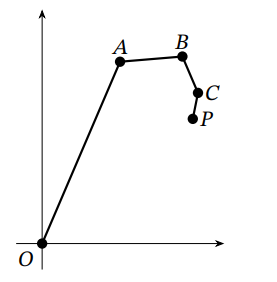

En robotarm består af 4 faste dele $O A, A B, B C \operatorname{og} C P$ samlet i planen să den kan bøjes ved ledderne $O, A, B$ og $C .$ Lad $\mathbf{a}=\overrightarrow{O A}, \mathbf{b}=\overrightarrow{A B}, \mathbf{c}=\overrightarrow{B C}, \mathbf{d}=\overrightarrow{C P}$
Robotarmens stíling er bestemt af matrícen
$$
S=\left[\begin{array}{llll}
\mathbf{a} & \mathbf{b} & \mathbf{c} & \mathbf{d}
\end{array}\right]
$$

Fra Python kan bibliotekerne `matplotlib` og `numpy` bruges til at tegne robotarmen og lave beregningerne for matrix operationerne.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

(a) Vælg nogle rimelige værdier for indgangerne i $\mathbf{a}, \mathbf{b}, \mathbf{c} \text{ og } \mathbf{d}$, og brug derefter matplotlib til at lave en tegningen af robotarmen som ovenfor.


Hvis man bruger `quiver` functionen fra `matplotlib.pyplot` kan hver led i robotarmen defineres som individuelle vektorer.

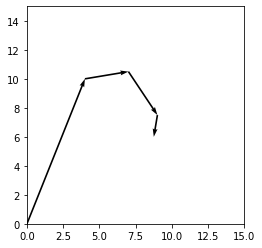

In [3]:
class Robot:
  def __init__(self, a=np.array([4, 10]), b=np.array([3, 0.5]) ,c=np.array([2, -3]) , d=np.array([-0.25, -1.5])):
    self.a = a
    self.b = b
    self.c = c
    self.d = d

  @property
  def x(self):
    return np.array([self.a[0], self.b[0], self.c[0], self.d[0]])
  
  @property
  def y(self):
    return np.array([self.a[1], self.b[1], self.c[1], self.d[1]])
    
  def draw(self):
    pivotx = [0, 0, 0, 0]
    pivoty = [0, 0, 0, 0]
    for i in range(1, 4):
        pivotx[i] = pivotx[i-1] + self.x[i-1]
        pivoty[i] = pivoty[i-1] + self.y[i-1]
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.quiver(pivotx, pivoty, self.x, self.y, scale_units ='xy', scale=1)
    plt.xlim([0, 15])
    plt.ylim([0, 15])
    return fig, ax

S=Robot()
fig, ax = S.draw()
fig.show()

(b) Bestem vektoren $\overrightarrow{O P}$ ud fra $\mathbf{a}, \mathbf{b}, \mathbf{c}, \mathbf{d}$.

Når vektorerne lægges sammen kan det nye endepunkt for vektoren $\overrightarrow{O P}$ defineres.

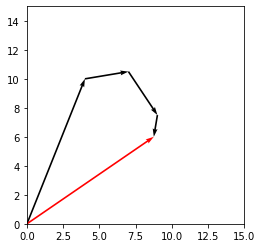

In [4]:
fig, ax = S.draw()
OP = np.array([np.sum(S.x), np.sum(S.y)])
ax.quiver(OP[0], OP[1], scale_units ='xy', scale=1, color='red')
fig.show()

(c) Gør rede for at når armen bøjes i ledet $C$, svarer det til at anvende en rotationsmatrix $R_{C}$ på $\mathbf{d},$ dvs.
$$
\operatorname{bøj}_{C}(S)=\left[\begin{array}{ll}
\mathbf{a} | \mathbf{b} |\mathbf{c}| R_{C} \mathbf{d} \end{array}\right]
$$
Lav en matplotlib tegning der viser dette.

En rotationsmatrice er defineret ud fra cosinus og sinus værdierne. Følgende formler beskriver hvorledes vi kan beregne cosinus og sinus værdierne til en vinkel. Da vi vælger at rotere robotarmen ud fra en vinkel vi selv vælger kan rotationsmatricen regnes ud fra denne vinkel.

Grunden til at der roteres for $\mathbf d$ stykket er fordi $\mathbf d$ har origo i leddet $C$. C kan betegnes som vores omdrejningspunkt eller pivot.

$$
\text { længde: }|\overrightarrow{O P}|=r=\sqrt{x^{2}+y^{2}}
$$

$$
c=\cos (\theta)=\frac{x}{\sqrt{x^{2}+y^{2}}}
$$

$$
s=\sin (\theta)=\frac{y}{\sqrt{x^{2}+y^{2}}}
$$

$$
t=\tan (\theta)=\frac{y}{x}
$$

$$
R=\left[\begin{array}{cc}
c & -s \\
s & c
\end{array}\right] \quad D =c^{2}+s^{2}=1
$$

In [5]:
def rot_matrix(θ)-> np.ndarray:
   c, s = np.cos(θ), np.sin(θ)
   R = np.array(((c, -s), (s, c)))
   return R

Nedenfor roterer jeg en halv omgang og derefter en halv omgang, hvor det sidste led i robotten vender tilbage til sind start position.

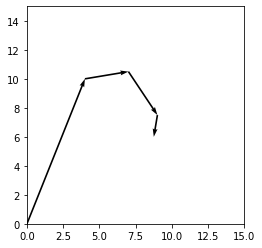

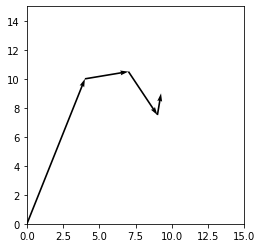

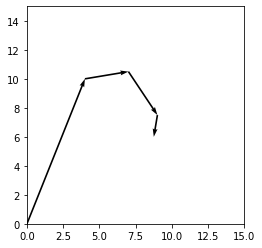

In [6]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

S=Robot()
fig, ax = S.draw()
fig.show()

R = rot_matrix(np.pi)
S=Robot(d=R@S.d)
fig, ax = S.draw()
fig.show()

S=Robot(d=R@S.d)
fig, ax = S.draw()
fig.show()

(d) Giv en opskrift for $bøj_A(S)$ , hvor robotarmen bøjes kun i ledet  $A$ . Vis dette i en tegning.

Når leddet A bøjes, skal det huskes at de efterfølgende led vil ligeledes rotere med $A$ som omdrejningspunkt. Derfor skal effekten af rotationsmatricen påføres alle efterfølgende led. Stykket $\mathbf{b}$ har sit begyndelsespunkt i ledet $A$.

$$
\operatorname{bøj}_{A}(S)=\left[\begin{array}{ll}
\mathbf{a} | R_{A}\mathbf{b} |R_{A}\mathbf{c}| R_{A} \mathbf{d} \end{array}\right]
$$

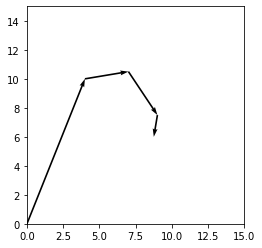

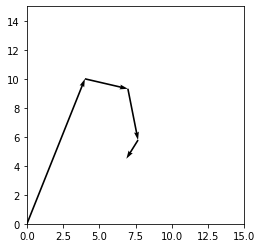

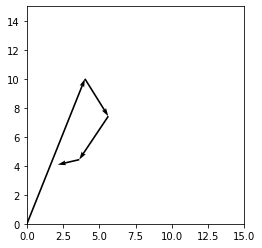

In [7]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

S=Robot()
fig, ax = S.draw()
fig.show()

R = rot_matrix(-np.pi/8)

S=Robot(b=R@S.b,c=R@S.c,d=R@S.d)
fig, ax = S.draw()
fig.show()

S=Robot(b=R@R@S.b,c=R@R@S.c,d=R@R@S.d)
fig, ax = S.draw()
fig.show()

(e) Vis at generelt er
$bøj_A( bøj_C(S))=bøj_C( bøj_A(S))$ 
dvs. det har ingen betydning hvilket led vi bøjer først.

For en rotationsmatrice vil productet være identisk uanset rækkefølgen de to matricer ganges sammen. 

$$bøj_C(S)=[a|b|c|R_Cd]$$
$$bøj_A(S)=[a|R_Ab|R_Ac|R_Ad]$$

$$bøj_A(bøj_C(S))=[a|R_Ab|R_Ac|R_A(R_Cd)]$$
$$bøj_C(bøj_A(S))=[a|R_Ab|R_Ac|R_C(R_Ad)]$$

$$R_AR_C\Leftrightarrow R_CR_A$$

Dette kan vises ved at opskrive resultatet for produktet af de to matricer: Vi kan erkende at hvis resultatet opskrives i en anden rækkefølge er det identisk uanset om $R_A$ påføres $R_C$ eller omvendt.


$$
R_A=\left[\begin{array}{cc}
c_A & -s_A \\
s_A & c_A
\end{array}\right] \quad 
R_C=\left[\begin{array}{cc}
c_C & -s_C \\
s_C & c_C
\end{array}\right]
$$
$$
\left[\begin{array}{cc}
c_A & -s_A \\
s_A & c_A
\end{array}\right]
\left[\begin{array}{cc}
c_C & -s_C \\
s_C & c_C
\end{array}\right]
\Leftrightarrow
\left[\begin{array}{cc}
c_C & -s_C \\
s_C & c_C
\end{array}\right]
\left[\begin{array}{cc}
c_A & -s_A \\
s_A & c_A
\end{array}\right]
$$

$$
\left[\begin{array}{cc}
c_Ac_C -s_As_C & -c_As_C -s_As_C  \\
s_A c_C + c_As_C & -s_A s_C + c_A c_C 
\end{array}\right]

\Leftrightarrow

\left[\begin{array}{cc}
c_Cc_A -s_Cs_A & -c_Cs_A -s_Cs_A  \\
s_C c_A + c_C s_A & -s_C s_A + c_C c_A 
\end{array}\right]
$$

Nedenfor har jeg vist at følgende kodestykker vil resultere i en identisk position for robotten.

```
S=Robot(b=R_A@S.b,c=R_A@S.c,d=R_A@R_C@S.d)
S=Robot(b=R_A@S.b,c=R_A@S.c,d=R_C@R_A@S.d)
```

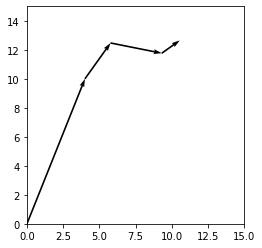

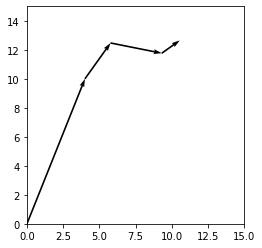

In [13]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

R_C = rot_matrix(np.pi/2)
R_A = rot_matrix(np.pi/4)

S=Robot()
S=Robot(b=R_A@S.b,c=R_A@S.c,d=R_A@R_C@S.d)
fig, ax = S.draw()
fig.show()

S=Robot()
S=Robot(b=R_A@S.b,c=R_A@S.c,d=R_C@R_A@S.d)
fig, ax = S.draw()
fig.show()